In [58]:
import numpy as np                    # linear algebra
import pandas as pd                   # data processing
import matplotlib.pyplot as plt       # data visualization
import seaborn as sns                 # data visualization
import plotly.graph_objs as go
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [30]:
df1 = pd.read_csv('ipl2008_2019.csv')
df1

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [32]:
df1.isna().sum().sort_values(ascending=False)/len(df1)*100

fielder             96.399334
dismissal_kind      95.066954
player_dismissed    95.066954
bye_runs             0.000000
total_runs           0.000000
extra_runs           0.000000
batsman_runs         0.000000
penalty_runs         0.000000
noball_runs          0.000000
legbye_runs          0.000000
match_id             0.000000
inning               0.000000
is_super_over        0.000000
bowler               0.000000
non_striker          0.000000
batsman              0.000000
ball                 0.000000
over                 0.000000
bowling_team         0.000000
batting_team         0.000000
wide_runs            0.000000
dtype: float64

In [33]:
df1.drop(['fielder','player_dismissed'],axis=1,inplace=True)

In [34]:
df1.duplicated().sum()

23

In [35]:
df1.drop_duplicates(inplace=True)

In [36]:
df1.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'dismissal_kind'],
      dtype='object')

In [37]:
df1.shape

(179055, 19)

In [38]:
df1.isna().sum()

match_id               0
inning                 0
batting_team           0
bowling_team           0
over                   0
ball                   0
batsman                0
non_striker            0
bowler                 0
is_super_over          0
wide_runs              0
bye_runs               0
legbye_runs            0
noball_runs            0
penalty_runs           0
batsman_runs           0
extra_runs             0
total_runs             0
dismissal_kind    170221
dtype: int64

In [39]:
df1.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000
mean,1801.169758,1.482969,10.162916,3.615543,0.000452,0.036726,0.004937,0.021133,0.004183,0.000056,1.246913,0.067035,1.313948
std,3471.116142,0.502075,5.677628,1.806869,0.021264,0.251177,0.116487,0.194907,0.070497,0.016711,1.608322,0.342567,1.605470
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [40]:
df1

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,dismissal_kind
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,run out
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN


# Deliveries Analaysis

# 1.Who are the top-10 batsmen with the most runs in the history of the Indian Premier League (IPL)?

Text(0.5, 1.0, 'Top-10 Batsman Runs in IPL')

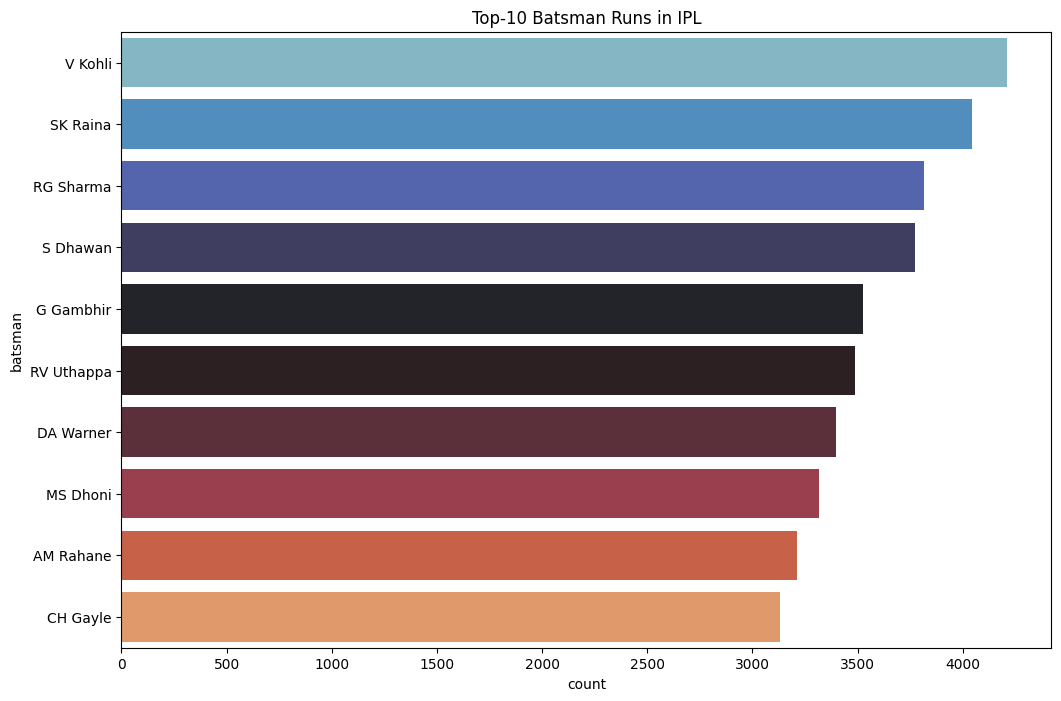

In [41]:
plt.figure(figsize = (12,8))
sns.countplot(y='batsman',order = df1['batsman'].value_counts().index[0:10],data = df1,palette='icefire')
plt.title('Top-10 Batsman Runs in IPL')

Across all season in Ipl the highest runs Scorer is Virat Kohli and Suresh Raina are most in runs and cross the margin above 4000 Runs.

In [42]:
runs=df1.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
runs.drop('match_id',axis=1,inplace=True)
inn1=runs[runs['inning'] == 1]

# 2.What is the grand total of runs scored by the 1st innings batting team in the IPL?

In [43]:
fig = px.histogram(inn1,color= 'batting_team',x='batting_team',y='total_runs',
                   title='1st Inns Batting Team Total Scores Throuhout IPL', text_auto='.2s',height = 700)
fig.show()

Mumbai Indians one of the most sucessfull team whose grand total of scored by the 1st innings is more than 16k.

In [44]:
runs=df1.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
runs.drop('match_id',axis=1,inplace=True)
inn1=runs[runs['inning'] == 2]

# 3.What is the grand total of runs scored by the 2nd innings batting team in the IPL?

In [46]:
fig = px.histogram(inn1,color= 'batting_team',x='batting_team',y='total_runs',
                   title='2nd Inns Batting Team Total Scores Throuhout IPL', text_auto='.2s',height = 700)
fig.show()

Kolkata Knight Riders comes in first position for 2nd Inns Runs score more than 200 apart from this there is battle also goes in Between Banglore,Punjab,Delhi and Mumbai respectively.

In [47]:
high_score = df1.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
score_200 = high_score[high_score['total_runs'] >= 200]

# 4.How many teams have scored more than 200 runs in an innings in the history of the Indian Premier League (IPL)?

In [51]:
score_200_counts = list(score_200['batting_team'].value_counts())
score_200_ls = list(score_200['batting_team'].value_counts().index)
fig = px.pie(df1,values=score_200_counts,names=score_200_ls,color_discrete_sequence=px.colors.sequential.Turbo)
fig.update_layout(title_text='Number of teams score more than 200', title_x=0.5,height = 500)
fig.update_traces(textposition='inside',textinfo='label+percent+value')
fig.show()

We find the team Banglore is one of the most scores 200+ runs against the opponents with percent also some around 18.1% and Chennai is 2nd most runs scorer team after banglore.

# 5.Which team has conceded the most number of 200+ totals in the history of the Indian Premier League (IPL)?

In [53]:
score_200_counts = list(score_200['bowling_team'].value_counts())
score_200_ls = list(score_200['bowling_team'].value_counts().index)
fig = px.pie(df1,values=score_200_counts,names=score_200_ls,color_discrete_sequence=px.colors.sequential.dense)
fig.update_layout(title_text="200 Concede Teams", title_x=0.5,height = 500)
fig.update_traces(textposition='inside',textinfo='label+percent+value')
fig.show()

Kingls XI Punjab holds this tag whose has conceded the most number of 200+ totals in the history of the Indian Premier League (IPL)

In [54]:
df1['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

# 6.Who are the top wicket-takers in the history of the Indian Premier League (IPL)?

In [55]:
bowling_wickets=df1[df1['dismissal_kind']!='run out']
bowling_tot=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count=bowling_tot.groupby('bowler').count().reset_index()
bowling_top=bowling_wick_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10]
fig = px.bar(top_bowlers, x='bowler', y='Wickets',
             hover_data=['bowler'], color='Wickets',title='Top 10 Bowlers in IPL- Seasons 2008-2019')
fig.show()

SL Malinga tooks most wickets in history of IPL followed by A Mishra comes in 2nd Position.

# 7.Who holds the record for the highest individual score in a single IPL match?

In [59]:
df1 = df1.groupby(by=['match_id', 'batsman', 'batting_team'])[['batsman_runs']].sum()
df1 = df1.sort_values(by=['batsman_runs'],ascending=False)[:5].iplot(kind='bar')

CH Gayle 175 from RCB he records most runs in single match earlier this record has got BB McCullum for 158 .

# Matches Analysis

In [60]:
df2 = pd.read_csv('matches.csv')
df2

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [61]:
df2.shape

(756, 18)

In [62]:
df2.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [64]:
df2.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [65]:
df2.drop(['umpire1','umpire2','umpire3'],axis=1,inplace=True)

In [66]:
df2.isna().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

# 8.Which city hosted the most number of matches?

Text(0.5, 1.0, 'City hosted the most number of matches')

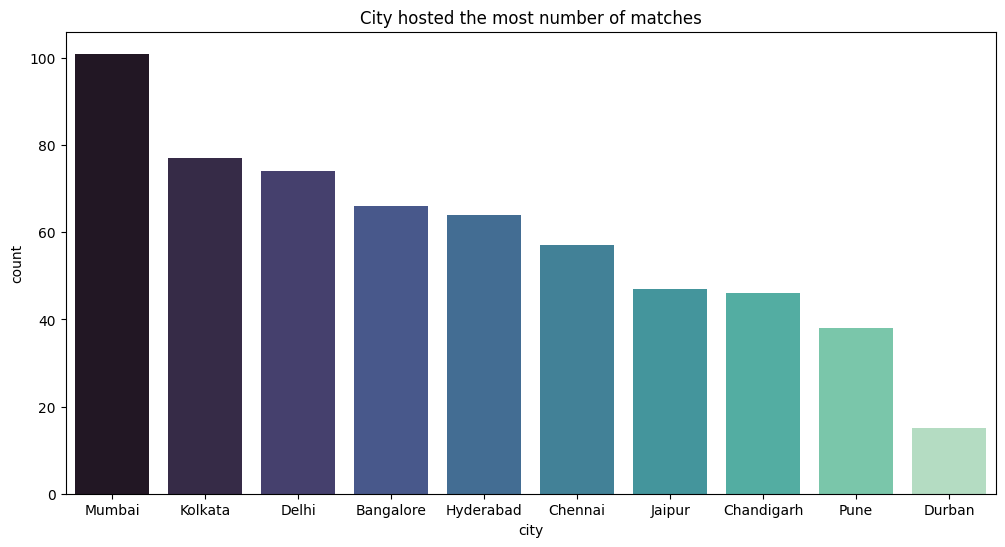

In [67]:
plt.figure(figsize = (12,6))
sns.countplot(x='city',order = df2['city'].value_counts().index[0:10],data = df2,palette='mako')
plt.title('City hosted the most number of matches')

Mumbai,Kolkata, Delhi and Banglore this top 4 city hosted the most number of matches in IPL.

# 9.Name the top-10 venue that has hosted the most number of games in IPL?

In [68]:
venue_counts = list(df2['venue'].value_counts())[:10]
venue_counts_ls = list(df2['venue'].value_counts().index)[:10]
fig = px.scatter(df2,x=venue_counts_ls,y=venue_counts,size_max=60)
fig.update_layout(title_text='Top-10 Most Venue Host', title_x=0.5,height=700,xaxis_title="Venue Name", yaxis_title="No.of Matches")
fig.update_traces(marker_size=20)
fig.show()

Eden Garden, M Chinnaswammy Stadium and Wankhede Stadium are top most venues has hosted the number of games in IPL.

# 10.How often do teams choose to field first after winning the toss in the IPL across all seasons?

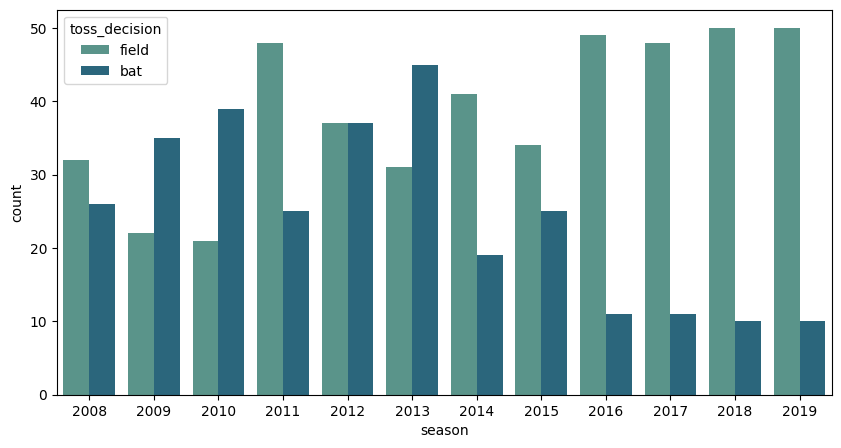

In [69]:
toss = df2.groupby('season')['toss_decision'].value_counts()
toss = pd.DataFrame(toss)
toss.columns = ['Count']
toss.reset_index(inplace=True)
toss.set_index('season',inplace=True)
plt.figure(figsize=(10,5))
sns.countplot(x='season',hue='toss_decision',data=df2, palette='crest');

Across all Season in IPL mostly teams likes to choose field first cause to chase target runs for easy way but certain years this trends somewhere opposite also in year 2009,2010 and 2013 the ipl teams choose bat first to set target whereas in year 2012 the toss decision for bat and field has equal.

# Concusion

1. Five Indian players have figured in the top ten IPL players list.
2. Mumbai Indians one of the most sucessfull team whose grand total of scored by the 1st innings is more than 16k.
3. Kolkata Knight Riders comes in first position for 2nd Inns Runs score more than 200.
4. Kingls XI Punjab holds this tag whose has conceded the most number of 200+.
5. SL Malinga tooks most wickets in history of IPL.
6. Mumbai,Kolkata, Delhi and Banglore this top 4 city hosted the most number of matches in IPL.
7. Chris Gayle has highest runs scorer in IPL.